In [1]:
#IMPORTING NECESSARY LIBRARIES
import cv2
import os
import pandas as pd
from google.colab import drive
#ACCESIVE THE DRIVE WHERE DATASET IS STORED
drive.mount('/content/drive')

csv_file_path = '/content/drive/My Drive/Diabetic Retinopathy/train.csv'
df_labels = pd.read_csv(csv_file_path)

# Setting labels and stages to map the imagr data
diagnosis_mapping = {
    0: ('No_DR', 0),
    1: ('Mild', 1),
    2: ('Moderate', 2),
    3: ('Severe', 3),
    4: ('Proliferative_DR', 4)
}

#Diagnosis codes ----> labels and stages
df_labels['Diagnosis_name'], df_labels['Diagnosis_stage'] = zip(*df_labels['diagnosis'].map(diagnosis_mapping))

image_data = pd.DataFrame(columns=['Filename', 'Image', 'Diagnosis_name', 'Diagnosis_stage'])

parent_folder = '/content/drive/My Drive/Diabetic Retinopathy/colored_images'

# Reading all the images and walking through the folder
for root, dirs, files in os.walk(parent_folder):
    for filename in files:
        if filename.endswith(".png"):
            image_path = os.path.join(root, filename)
            image = cv2.imread(image_path)
            id_code = os.path.splitext(filename)[0]
            diagnosis_info = df_labels.loc[df_labels['id_code'] == id_code]
            diagnosis_name = diagnosis_info['Diagnosis_name'].values[0]
            diagnosis_stage = diagnosis_info['Diagnosis_stage'].values[0]
            image_data = pd.concat([image_data, pd.DataFrame({'Filename': [filename], 'Image': [image],
                                                              'Diagnosis_name': [diagnosis_name],
                                                              'Diagnosis_stage': [diagnosis_stage]})],
                                   ignore_index=True)



Mounted at /content/drive


In [2]:

print(image_data)


             Filename                                              Image  \
0    001639a390f0.png  [[[2, 1, 3], [1, 0, 2], [2, 1, 3], [2, 1, 3], ...   
1    11242a67122d.png  [[[3, 0, 4], [3, 1, 4], [2, 0, 2], [2, 1, 2], ...   
2    02685f13cefd.png  [[[1, 0, 2], [1, 0, 2], [1, 0, 2], [1, 0, 2], ...   
3    07122e268a1d.png  [[[1, 0, 2], [1, 0, 2], [1, 0, 2], [1, 0, 2], ...   
4    8ac0c44bbf24.png  [[[2, 2, 2], [2, 1, 3], [2, 1, 3], [2, 1, 3], ...   
..                ...                                                ...   
245  e96bd80a8a53.png  [[[2, 1, 3], [2, 1, 3], [2, 1, 3], [3, 2, 4], ...   
246  eeb231c3ef1f.png  [[[2, 2, 2], [2, 1, 3], [2, 1, 3], [2, 1, 3], ...   
247  e9ff9352ccb3.png  [[[2, 1, 3], [3, 3, 3], [1, 0, 2], [1, 1, 1], ...   
248  f55e1d2a19e4.png  [[[2, 1, 3], [2, 1, 3], [2, 1, 3], [2, 1, 3], ...   
249  fecf4c5ae84b.png  [[[2, 1, 3], [2, 1, 3], [2, 1, 3], [2, 1, 3], ...   

       Diagnosis_name Diagnosis_stage  
0    Proliferative_DR               4  
1    Pr

Shape of image data: (250, 4)

First few rows of image data:
           Filename                                              Image  \
0  001639a390f0.png  [[[2, 1, 3], [1, 0, 2], [2, 1, 3], [2, 1, 3], ...   
1  11242a67122d.png  [[[3, 0, 4], [3, 1, 4], [2, 0, 2], [2, 1, 2], ...   
2  02685f13cefd.png  [[[1, 0, 2], [1, 0, 2], [1, 0, 2], [1, 0, 2], ...   
3  07122e268a1d.png  [[[1, 0, 2], [1, 0, 2], [1, 0, 2], [1, 0, 2], ...   
4  8ac0c44bbf24.png  [[[2, 2, 2], [2, 1, 3], [2, 1, 3], [2, 1, 3], ...   

     Diagnosis_name Diagnosis_stage  
0  Proliferative_DR               4  
1  Proliferative_DR               4  
2  Proliferative_DR               4  
3  Proliferative_DR               4  
4  Proliferative_DR               4  

Distribution of diagnoses:
Diagnosis_name
Proliferative_DR    50
Severe              50
Moderate            50
No_DR               50
Mild                50
Name: count, dtype: int64


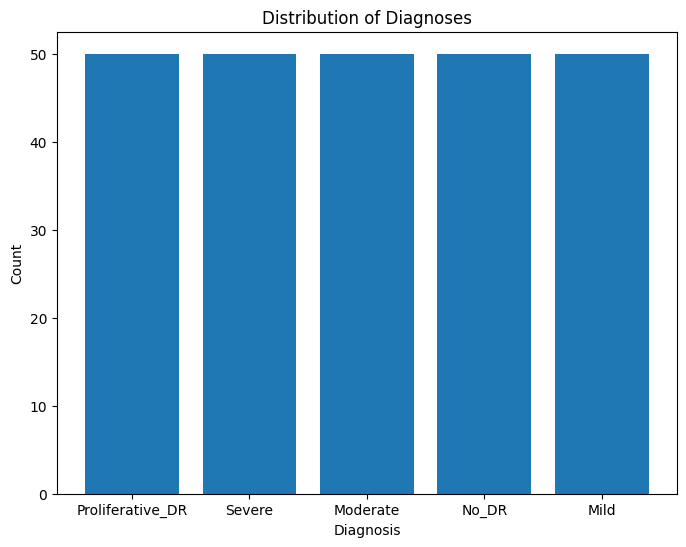

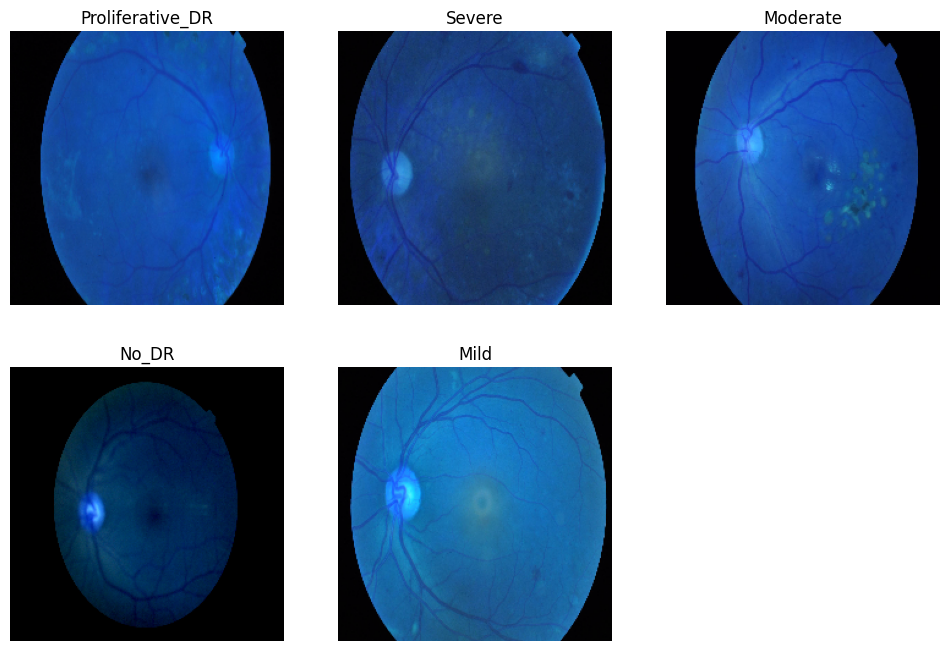

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# SHAPE
print("Shape of image data:", image_data.shape)

# df.head()
print("\nFirst few rows of image data:")
print(image_data.head())

# distribution of diagnoses
diagnosis_counts = image_data['Diagnosis_name'].value_counts()
print("\nDistribution of diagnoses:")
print(diagnosis_counts)

#  distribution of diagnoses
plt.figure(figsize=(8, 6))
plt.bar(diagnosis_counts.index, diagnosis_counts.values)
plt.title("Distribution of Diagnoses")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# sample images from each diagnosis category
plt.figure(figsize=(12, 8))
for i, diagnosis in enumerate(diagnosis_counts.index):
    sample_image = image_data.loc[image_data['Diagnosis_name'] == diagnosis, 'Image'].iloc[0]
    plt.subplot(2, 3, i + 1)
    plt.imshow(sample_image)
    plt.title(diagnosis)
    plt.axis('off')
plt.show()


In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_data = []

# Augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    brightness_range=[1.5, 1.7],
    fill_mode='nearest'
)

# Augmenting images and add them to the list
for index, row in image_data.iterrows():
    image = np.expand_dims(row['Image'], axis=0)  # Add batch dimension

    # Custom color transformation
    green_channel = image[0][..., 1] * 0.6
    red_channel = image[0][..., 0] * 1.2
    blue_channel = image[0][..., 2] * 0.4
    color_image = np.stack([red_channel, green_channel, blue_channel], axis=-1)

    augmented_images = datagen.flow(np.array([color_image]), batch_size=1)
    for i in range(5):  # Generating 5 augmented images per original image
        augmented_image = next(augmented_images)[0].astype(np.uint8)
        augmented_data.append({
            'Filename': row['Filename'],
            'Image': augmented_image,
            'Diagnosis_name': row['Diagnosis_name'],
            'Diagnosis_stage': row['Diagnosis_stage']
        })

# Dictionaries to DataFrame
augmented_image_data = pd.DataFrame(augmented_data)

# Drop original images and keep only augmented images
augmented_image_data = augmented_image_data.reset_index(drop=True)

In [5]:
# Group by 'Filename' and count rows in each group
image_counts = augmented_image_data.groupby('Filename').size()

print("Counts of images for each record:")
print(image_counts)

# Checking/ if there are any records with fewer or more than 5 images
records_with_incorrect_count = image_counts[~(image_counts == 5)]
print("\nRecords with incorrect count of images:")
print(records_with_incorrect_count)



Counts of images for each record:
Filename
001639a390f0.png    5
002c21358ce6.png    5
005b95c28852.png    5
0097f532ac9f.png    5
00f6c1be5a33.png    5
                   ..
ff344e5c9341.png    5
ff631653374e.png    5
ff77e8e5b5f3.png    5
ffcf7b45f213.png    5
ffec9a18a3ce.png    5
Length: 250, dtype: int64

Records with incorrect count of images:
Series([], dtype: int64)


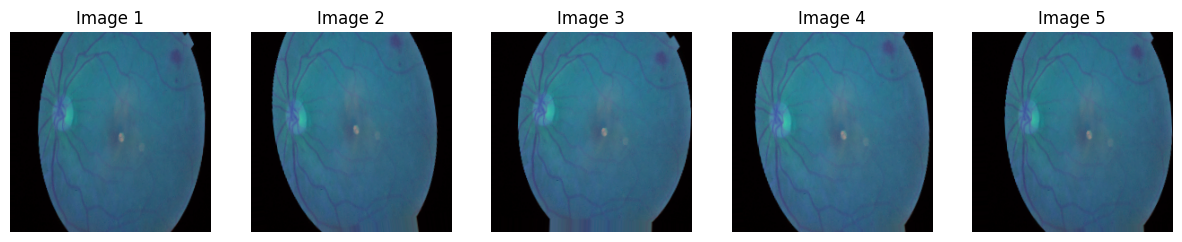

In [6]:
import matplotlib.pyplot as plt

# Sample filename
filename = 'ff344e5c9341.png'

#FILTERING
record_data = augmented_image_data[augmented_image_data['Filename'] == filename]

# Printing all images of this record
plt.figure(figsize=(15, 5))
for i, (_, row) in enumerate(record_data.iterrows(), 1):
    plt.subplot(1, len(record_data), i)
    plt.imshow(row['Image'])
    plt.title(f"Image {i}")
    plt.axis('off')
plt.show()


In [10]:
# Set random seed
import tensorflow as tf
tf.random.set_seed(2)
np.random.seed(2)


In [13]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# MaxIMAGE_HEIGHT and IMAGE_WIDTH
max_height = 0
max_width = 0

# Iterate over all images
for _, row in augmented_image_data.iterrows():
    image_height, image_width, _ = row['Image'].shape
    max_height = max(max_height, image_height)
    max_width = max(max_width, image_width)

# Step 1: Data Preprocessing
# Normalize pixel values
X = np.array(augmented_image_data['Image'].tolist()) / 255.0
y = augmented_image_data['Diagnosis_stage']

# Integer encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Architecture Design
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(max_height, max_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(np.max(y) + 1, activation='softmax')  # Number of classes dynamically determined
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Model Training
history = model.fit(X_train, y_train, epochs=9, validation_data=(X_val, y_val))

# Step 4: Model Evaluation
# Evaluate model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Generate predictions on validation set
y_pred = np.argmax(model.predict(X_val), axis=-1)

# Print classification report
print(classification_report(y_val, y_pred))


Epoch 1/9
32/32 [==============================] - 5s 82ms/step - loss: 1.5617 - accuracy: 0.3110 - val_loss: 1.3995 - val_accuracy: 0.3720
Epoch 2/9
32/32 [==============================] - 2s 57ms/step - loss: 1.3002 - accuracy: 0.4300 - val_loss: 1.3039 - val_accuracy: 0.4240
Epoch 3/9
32/32 [==============================] - 2s 53ms/step - loss: 1.1865 - accuracy: 0.5070 - val_loss: 1.2793 - val_accuracy: 0.4560
Epoch 4/9
32/32 [==============================] - 2s 53ms/step - loss: 1.0751 - accuracy: 0.5410 - val_loss: 1.1533 - val_accuracy: 0.5000
Epoch 5/9
32/32 [==============================] - 2s 59ms/step - loss: 0.8869 - accuracy: 0.6260 - val_loss: 1.0526 - val_accuracy: 0.5640
Epoch 6/9
32/32 [==============================] - 2s 53ms/step - loss: 0.7321 - accuracy: 0.7050 - val_loss: 0.9472 - val_accuracy: 0.6400
Epoch 7/9
32/32 [==============================] - 2s 53ms/step - loss: 0.5733 - accuracy: 0.7970 - val_loss: 0.8500 - val_accuracy: 0.6720
Epoch 8/9
32/32 [===

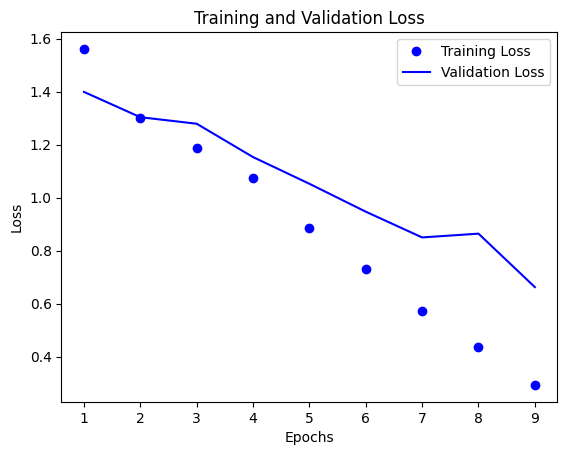

In [14]:
import matplotlib.pyplot as plt

# Extract training loss and validation loss from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
